## Aprendizaje no supervisado: Clustering



In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib as plt
import seaborn as sns

# forzamos que haya 3 grupos
X, y = make_blobs(n_samples=500, centers=3, random_state=42, cluster_std=1.0)
X[:5]


array([[-5.73035386, -7.58328602],
       [ 1.94299219,  1.91887482],
       [ 6.82968177,  1.1648714 ],
       [-2.90130578,  7.55077118],
       [ 5.84109276,  1.56509431]])

In [2]:
y[:5]

array([2, 1, 1, 0, 1])

In [3]:
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.7)
plt.title('Datos sin etiquetar');


AttributeError: module 'matplotlib' has no attribute 'scatter'

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [ ]:
from sklearn.metrics import silhouette_score

print('kmeans.labels_', kmeans.labels_[:10])
print('kmeans.cluster_centers_', kmeans.cluster_centers_) # centroides
print('kmeans.inertia_', kmeans.inertia_)
print('silhouette_score', silhouette_score(X, kmeans.labels_))

kmeans.labels_ [1 0 0 2 0 0 1 0 0 1]
kmeans.cluster_centers_ [[ 4.61416263  1.93184055]
 [-6.83120002 -6.75657544]
 [-2.51336974  9.03492867]]
kmeans.inertia_ 955.6493433489619
silhouette_score 0.8437565906781406


In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, alpha=0.7, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200)
plt.title('Datos etiquetados');

AttributeError: module 'matplotlib' has no attribute 'scatter'

AttributeError: module 'matplotlib' has no attribute 'title'

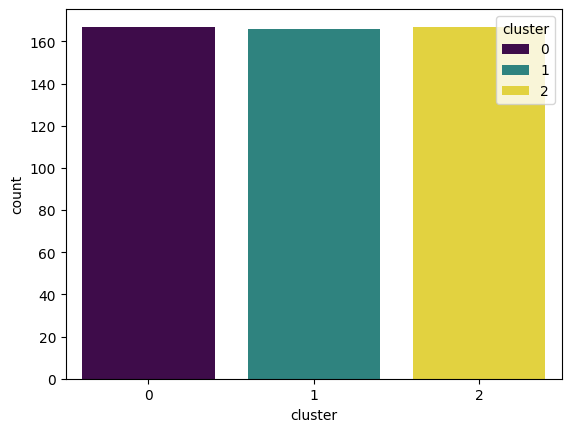

In [ ]:
# countplot de los clusters
df_labels = pd.DataFrame({'cluster': kmeans.labels_})
sns.countplot(df_labels, x='cluster', palette='viridis', hue='cluster')
plt.title('Conteo de clusters')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# probar ????

# accuracy_score(y, kmeans.labels_)
print(classification_report(y, df_labels['cluster']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     167.0
           1       0.00      0.00      0.00     167.0
           2       0.00      0.00      0.00     166.0

    accuracy                           0.00     500.0
   macro avg       0.00      0.00      0.00     500.0
weighted avg       0.00      0.00      0.00     500.0



In [ ]:
????

In [ ]:
inertias = []
siluetas = []
k_range = range(2,15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    siluetas.append(silhouette_score(X, kmeans.labels_))
    
plt.figure(figsize=(12,5))   
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o', color='blue')   
plt.xlabel('n_cluster')
plt.ylabel('inertia')
plt.title('Inercias')
plt.xticks(k_range)
plt.grid(True)
 
plt.subplot(1, 2, 2)
plt.plot(k_range, inertias, marker='o', color='green')   
plt.xlabel('n_cluster')
plt.ylabel('coeficiente de siluetas')
plt.title('Siluetas')
plt.xticks(k_range)
plt.grid(True);

TypeError: 'module' object is not callable

?????

In [ ]:
# con el de iris
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import StandardScaler

iris = load_iris()
X_iris = iris.data 
y_iris_true = iris.target  # Etiquetas reales (Setosa, Versicolor, Virginica)
feature_names = iris.feature_names

scaler = StandardScaler()
scaler.fit_transform(X_iris)
kmeans_iris = KMeans(n_clusters=3, random_state=42)
kmeans_iris.fit(X_iris)

labels_kmeans_iris = kmeans_iris.labels_
inertia_kmeans_iris = kmeans_iris.inertia_
silhouette_kmeans_iris = silhouette_score(X_iris, labels_kmeans_iris)

print(f"K-Means (Iris) -> Inercia: {inertia_kmeans_iris:.2f}")
print(f"K-Means (Iris) -> Coeficiente de Silueta: {silhouette_kmeans_iris:.2f}")

plt.figure(figsize=(6, 5))
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=labels_kmeans_iris, cmap='viridis')
plt.title("K-Means en Iris (usando 2 primeras características)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

K-Means (Iris) -> Inercia: 78.86
K-Means (Iris) -> Coeficiente de Silueta: 0.55


TypeError: 'module' object is not callable

In [ ]:
print(classification_report(y_iris_true, kmeans_iris.labels_))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.23      0.28      0.25        50

    accuracy                           0.09       150
   macro avg       0.08      0.09      0.08       150
weighted avg       0.08      0.09      0.08       150



In [ ]:
import numpy as np 

unique_labels = set(dbscan.labels_)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
plt.figure(figsize=(5, 5))
# Asignamos un color distinto para el cluster -1 (puntos considerados outliers)

for label, col in zip(unique_labels, colors):
    class_member_mask = (dbscan.labels_ == label)
    if label == -1:
        # Color gris para outliers
        col = 'gray'
    plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1], 
                c=[col], s=30, label=f"Cluster {label}")
plt.title("Clustering DBSCAN (make_blobs)")
plt.legend()
plt.show()

NameError: name 'dbscan' is not defined